In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc #한글깨짐

In [2]:
#한글깨짐
rc('font', family='AppleGothic') 			
plt.rcParams['axes.unicode_minus'] = False  

# 데이터 불러오기 

In [3]:

df_voice=pd.read_csv('/Users/yeseulseo/CP2 New/EDA/voice2.csv')

df_voice

,file_name,label,audio_path
0,A_ASH_001.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_001...
1,A_ASH_002.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_002...
2,A_ASH_003.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_003...
3,A_ASH_004.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_004...
4,A_ASH_005.wav,2,/Users/yeseulseo/CP2 New/Train/A/ASH/A_ASH_005...
...,...,...,...
4495,S_YSH_026.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_026...
4496,S_YSH_027.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_027...
4497,S_YSH_028.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_028...
4498,S_YSH_029.wav,1,/Users/yeseulseo/CP2 New/Train/S/YSH/S_YSH_029...


## H(행복) = 0, S(슬픔) = 1, A(화남) = 2, E(당황) = 3, N(중립) = 4

#   MFCC 평균 함수


#   MFCC 평균 함수


In [4]:
#a=감정숫자, b= 데이터간격
def mfcc_mean(a,b):
    #mfcc 값들을 모을 리스트 
    mfcc_collect=[]
    for i in range(0,4499,b):
        if df_voice['label'][i]==a :
            audio_path = df_voice['audio_path'][i]
            y, sr = librosa.load(audio_path,sr=16000)
            mfcc = librosa.feature.mfcc(y = y, sr = sr,n_mels=40)
            pad2d = lambda h, k: h[:, 0:k] if h.shape[1] > k else np.hstack((h, np.zeros((h.shape[0], k-h.shape[1]))))
            padded_mfcc = pad2d(mfcc,100)
            mfcc_collect.append(padded_mfcc)
            
    #mfcc 합
    mfcc_sum = mfcc_collect[0]
    for j in range(1, len(mfcc_collect)):
        mfcc_sum = mfcc_sum + mfcc_collect[j]
    #mfcc 평균
    mfcc_mean = mfcc_sum/ len(mfcc_collect)

    return mfcc_mean



# Mel Spectrogram 평균

In [5]:
def mel_mean(a,b):
    mel_collect=[]
    for i in range(0,4499,b):
        if df_voice['label'][i]==a :
            audio_path = df_voice['audio_path'][i]
            y, sr = librosa.load(audio_path,sr=16000)
            S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=40)
            log_S = librosa.power_to_db(S, ref=np.max)
            pad2d = lambda h, k: h[:, 0:k] if h.shape[1] > k else np.hstack((h, np.zeros((h.shape[0], k-h.shape[1]))))
            padded_mel = pad2d(log_S,100)
            mel_collect.append(padded_mel)
        #mfcc 합
    mel_sum = mel_collect[0]
    for j in range(1, len(mel_collect)):
        mel_sum = mel_sum + mel_collect[j]
    #mfcc 평균
    mel_mean = mel_sum/ len(mel_collect)

    return mel_mean

In [6]:

mfcc_H = mfcc_mean(0,30)
mfcc_S = mfcc_mean(1,30)
mfcc_A = mfcc_mean(2,30)
mfcc_E = mfcc_mean(3,30)
mfcc_N = mfcc_mean(4,30)
mel_H = mel_mean(0,30)
mel_S = mel_mean(1,30)
mel_A = mel_mean(2,30)
mel_E = mel_mean(3,30)
mel_N = mel_mean(4,30)



# 그래프 그리기

In [9]:
def spechow(mel,mfcc,T1,T2):

    
    plt.figure(figsize=(14,14))

    #Mel spectrogram
    ax = plt.subplot(2, 1, 1)
    librosa.display.specshow(mel, sr=16000,x_axis='time',y_axis='hz')
    plt.title(T1)
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')

    #MFCC
    ax = plt.subplot(2, 1, 2)
    librosa.display.specshow(mfcc, sr=16000,x_axis='time')
    plt.title(T2)
    plt.xlabel("Time")
    plt.ylabel("MFCC coeffis")
    plt.colorbar()

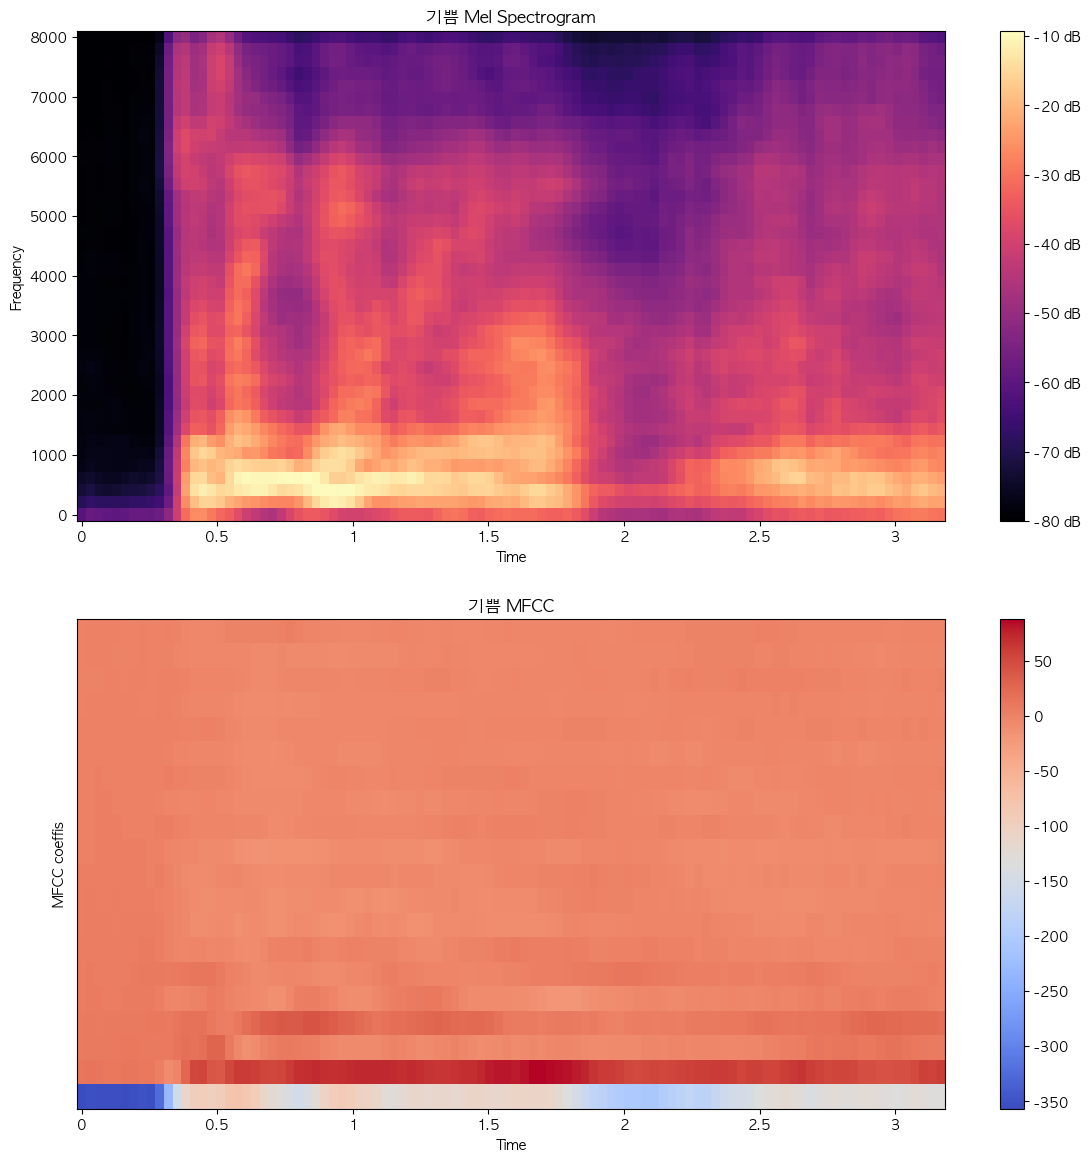

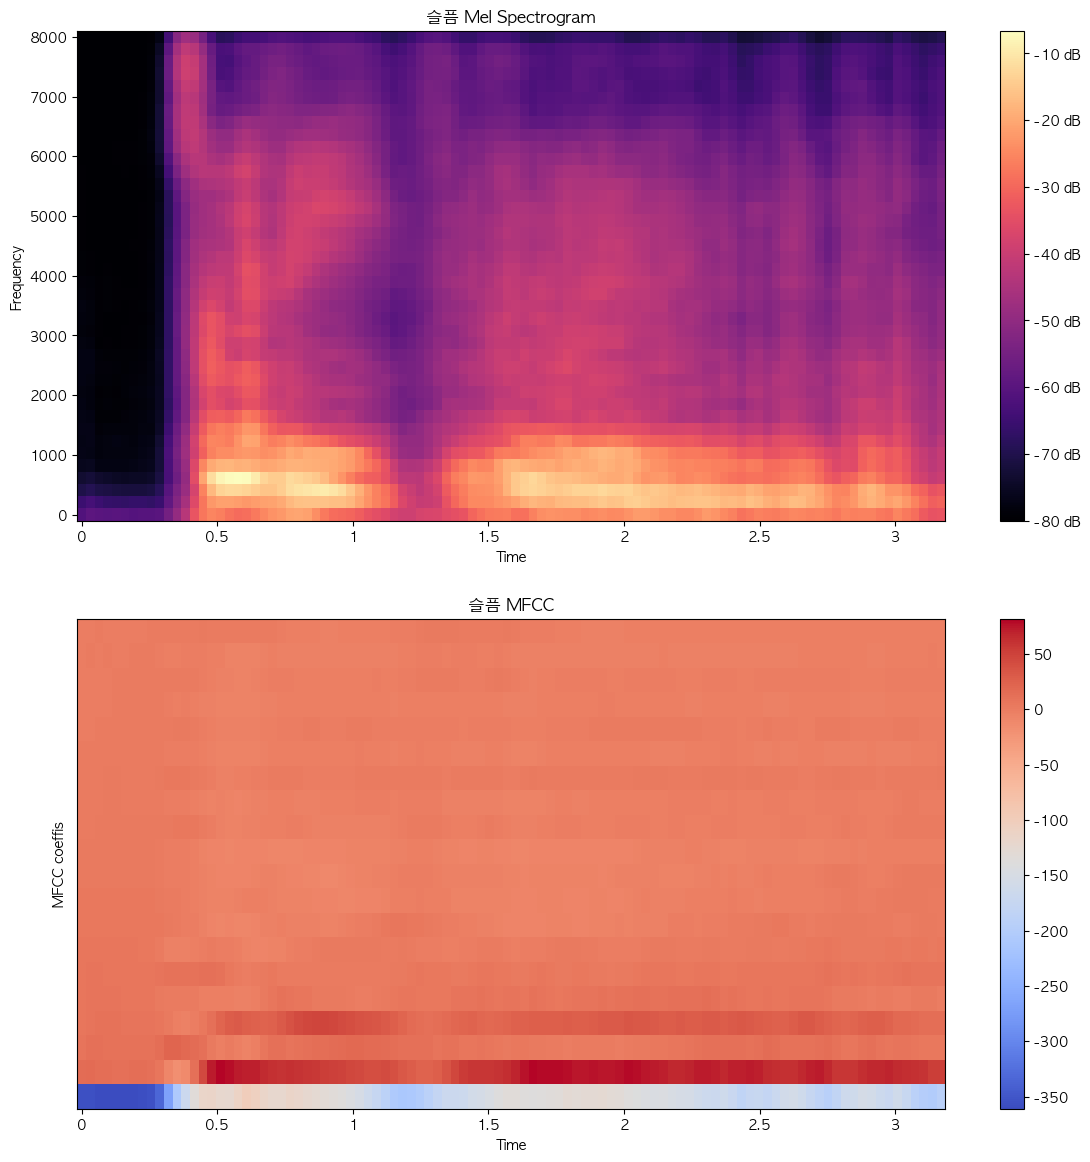

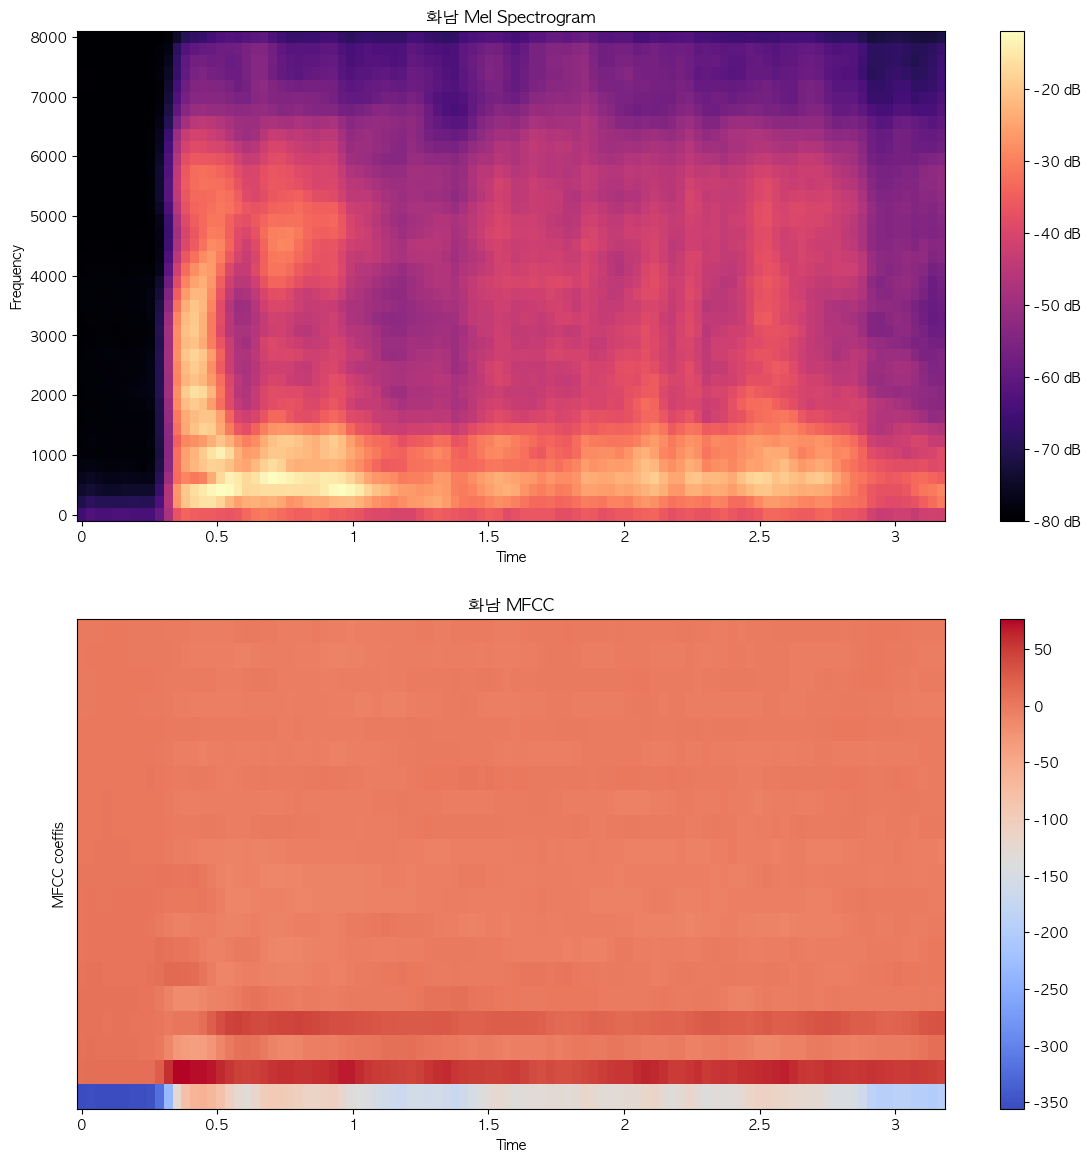

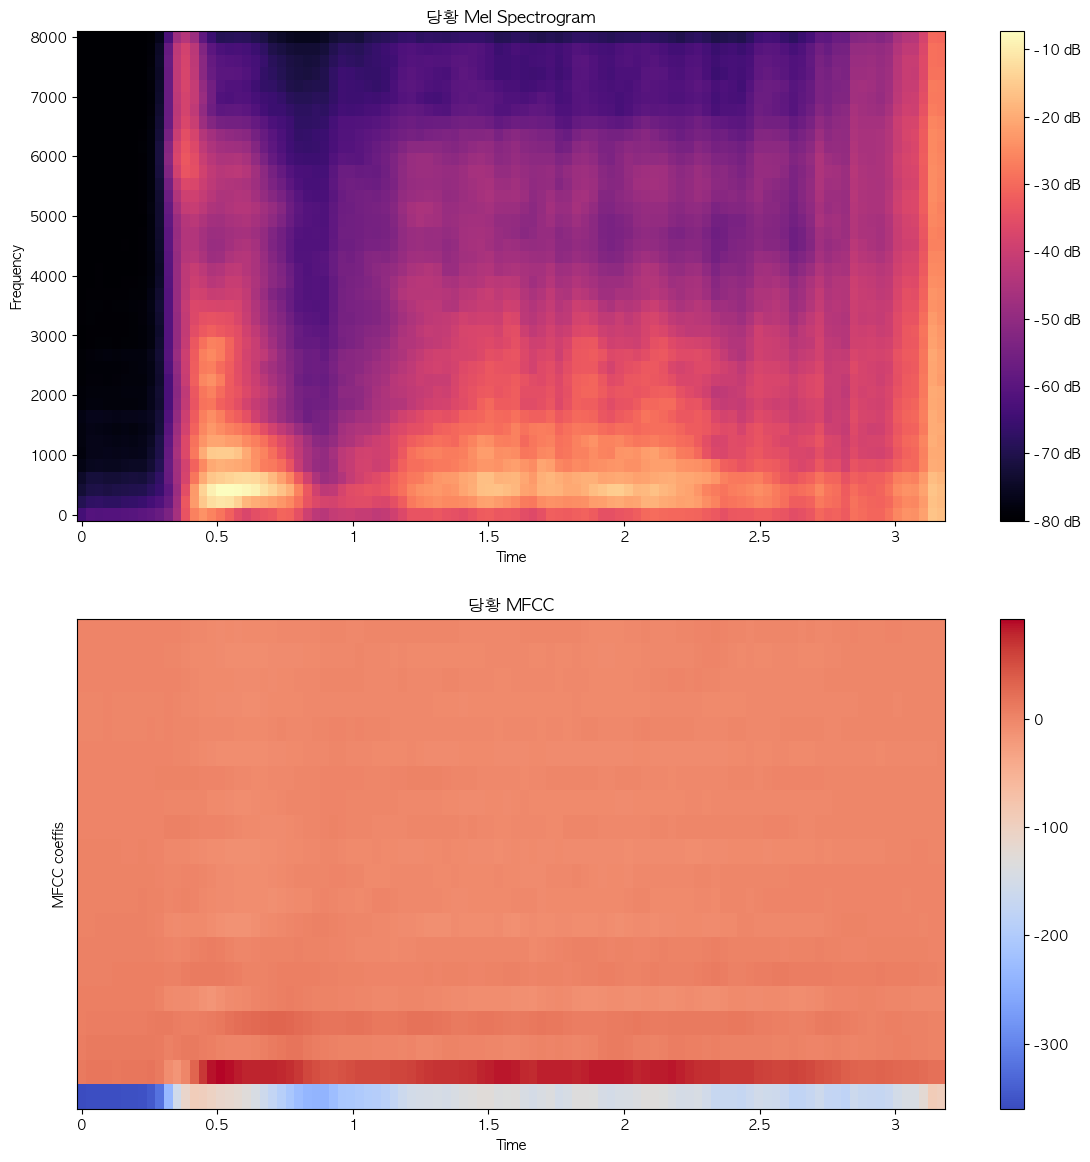

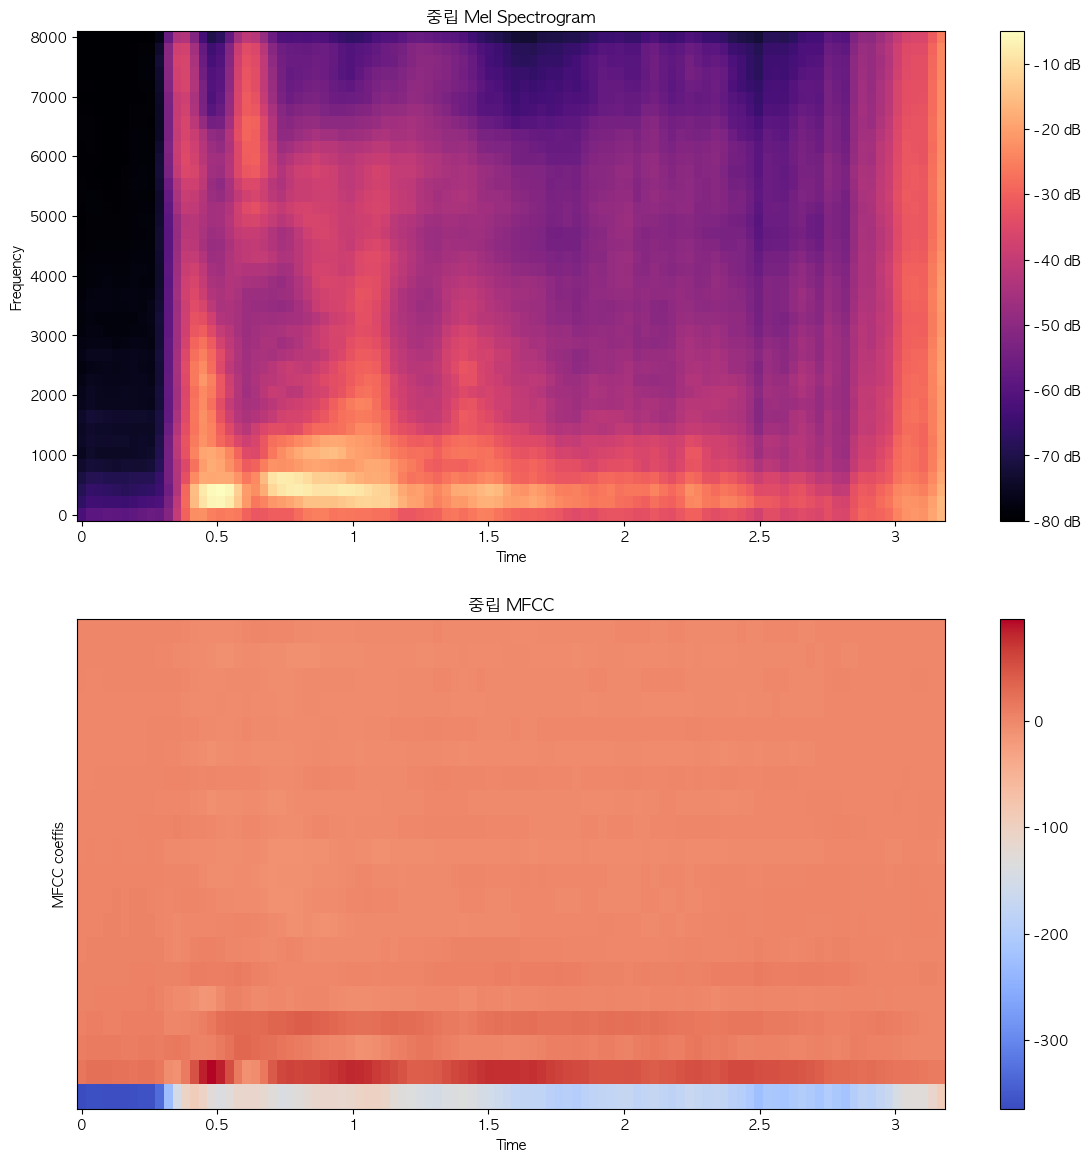

In [10]:
## H(행복) = 0, S(슬픔) = 1, A(화남) = 2, E(당황) = 3, N(중립) = 4
spechow(mel_H,mfcc_H,'기쁨 Mel Spectrogram','기쁨 MFCC')
spechow(mel_S,mfcc_S,'슬픔 Mel Spectrogram','슬픔 MFCC')
spechow(mel_A,mfcc_A,'화남 Mel Spectrogram','화남 MFCC')
spechow(mel_E,mfcc_E,'당황 Mel Spectrogram','당황 MFCC')
spechow(mel_N,mfcc_N,'중립 Mel Spectrogram','중립 MFCC')